0.3176769140606974
0.05293248525724958
0.5961207535084603


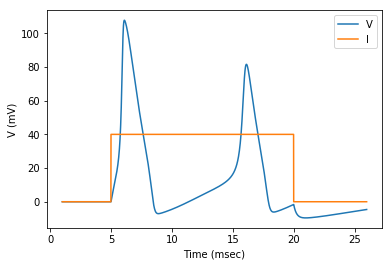

In [2]:
from numpy import *
from pylab import *
from math  import *

T      = 25
dt     = 0.01
time   = arange(1,(T+1),dt)
V_0    = 0
I      = [None]*len(time)
V      = [None]*len(time)
V[0]   = V_0
n      = [None]*len(time)
m      = [None]*len(time)
h      = [None]*len(time)
E_Na   = 115
E_K    = -12
E_L    = 10.6
g_Na   = 120
g_K    = 36
g_L    = 0.3
C      = 1
# the K gates cotrolled by n
def alpha_n(v): 
    if v!=10: 
        alphan = (0.1-0.01*v)/(exp(1-0.1*v) - 1)  
    else: 
        alphan = 0.1
    return alphan
def beta_n(v):
    betan = 0.125*exp(-1*v/80)
    return betan
# the Na gates cotrolled by m
def alpha_m(v):
    alpham = 0.1*(25-v)/(exp((25-v)/10)-1)
    return alpham
def beta_m(v):
    betam = 4*exp(-1*v/18)
    return betam
# the Na gates cotrolled by h
def alpha_h(v):
    alphah = 0.07*exp(-1*v/20)
    return alphah
def beta_h(v):
    betah = 1/(exp((30-v)/10)+1)
    return betah

m[0] = alpha_m(V_0) / (alpha_m(V_0) + beta_m(V_0))
n[0] = alpha_n(V_0) / (alpha_n(V_0) + beta_n(V_0))
h[0] = alpha_h(V_0) / (alpha_h(V_0) + beta_h(V_0))   



# update the list of currency values with injection
def inject(I_val = 10):
    for j, t in enumerate(time):
        if 20 >= t >= 5:
            I[j] = I_val  #current injection (uA/cm2)
        else:
            I[j] = 0


# update the list of voltages
def v_record():
    for j in range(1, len(time)):
        n[j] = n[j-1] + dt*(alpha_n(V[j-1])*(1 - n[j-1]) - beta_n(V[j-1])*n[j-1])
        m[j] = m[j-1] + dt*(alpha_m(V[j-1])*(1 - m[j-1]) - beta_m(V[j-1])*m[j-1])
        h[j] = h[j-1] + dt*(alpha_h(V[j-1])*(1 - h[j-1]) - beta_h(V[j-1])*h[j-1])

        V[j] = V[j-1] + dt*(I[j-1] - (g_Na*(m[j-1]**3)*h[j-1]*(V[j-1] - E_Na) 
                                      + g_K*(n[j-1]**4)*(V[j-1] - E_K) 
                                      + g_L*(V[j-1] - E_L)))/C 
        #print(alpha_n(V[j-1]))
        #print(beta_n(V[j-1]))
        #print(alpha_m(V[j-1]))
        #print(beta_m(V[j-1]))
        #print(alpha_h(V[j-1]))
        #print(beta_h(V[j-1]))

def main():
    I_input = input('input your current injection value here: ')
    inject(eval(I_input))
    v_record()
    plot(time, V, time, I)
    legend(('V','I'))
    ylabel('V (mV)')
    xlabel('Time (msec)')
    show()


print(n[0])
print(m[0])
print(h[0])

main()
